# Dogecoin Price Prediction

Based on [Dogecoin Price Prediction Using Python & Machine Learning](https://www.youtube.com/watch?v=FMKnvsKoQxE) from [Computer Science](https://www.youtube.com/channel/UCbmb5IoBtHZTpYZCDBOC1CA)

This program attempts to predict future price of Dogecoin

**Disclaimer:** _Investing in the stock market involves risk and can lead to monetary loss. This material is purely for educational purposes and should not be taken as professional investment advice. Invest at your own discretion._

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data

In [2]:
df = pd.read_csv('DogecoinPricePredictionData.csv')

Show the data

In [3]:
df

,Date,Close
0,2020-12-01,0.003335
1,2020-12-02,0.003374
2,2020-12-03,0.003428
3,2020-12-04,0.003298
4,2020-12-05,0.003397
...,...,...
132,2021-04-12,0.070767
133,2021-04-13,0.093445
134,2021-04-14,0.121517
135,2021-04-15,0.182207


Set the date as index

In [4]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

Show the data

In [5]:
df

,Date,Close
2020-12-01,2020-12-01,0.003335
2020-12-02,2020-12-02,0.003374
2020-12-03,2020-12-03,0.003428
2020-12-04,2020-12-04,0.003298
2020-12-05,2020-12-05,0.003397
...,...,...
2021-04-12,2021-04-12,0.070767
2021-04-13,2021-04-13,0.093445
2021-04-14,2021-04-14,0.121517
2021-04-15,2021-04-15,0.182207


Get the close price

In [6]:
df = df[['Close']]

Show the data

In [7]:
df

,Close
2020-12-01,0.003335
2020-12-02,0.003374
2020-12-03,0.003428
2020-12-04,0.003298
2020-12-05,0.003397
...,...
2021-04-12,0.070767
2021-04-13,0.093445
2021-04-14,0.121517
2021-04-15,0.182207


Create a variable to store the number of days into the future that we want to predict

In [8]:
prediction_days = 1

Create a new column called _Prediction_

In [9]:
df['Prediction'] = df[['Close']].shift(-prediction_days)

Show the data

In [10]:
df

,Close,Prediction
2020-12-01,0.003335,0.003374
2020-12-02,0.003374,0.003428
2020-12-03,0.003428,0.003298
2020-12-04,0.003298,0.003397
2020-12-05,0.003397,0.003388
...,...,...
2021-04-12,0.070767,0.093445
2021-04-13,0.093445,0.121517
2021-04-14,0.121517,0.182207
2021-04-15,0.182207,0.365870


Create the independent dataset (X)

In [11]:
X = np.array(df.drop(['Prediction'], 1))

Remove the last n+1 rows of data where n is the prediction_days

In [12]:
X = X[:len(df)-prediction_days-1]

Print the data

In [13]:
print(X)

[[0.003335]
 [0.003374]
 [0.003428]
 [0.003298]
 [0.003397]
 [0.003388]
 [0.003342]
 [0.003179]
 [0.003158]
 [0.003105]
 [0.003079]
 [0.003163]
 [0.003256]
 [0.003231]
 [0.003206]
 [0.003416]
 [0.00373 ]
 [0.003858]
 [0.003927]
 [0.004625]
 [0.004787]
 [0.004508]
 [0.003768]
 [0.00457 ]
 [0.004582]
 [0.004494]
 [0.004548]
 [0.004592]
 [0.004486]
 [0.004636]
 [0.004682]
 [0.005685]
 [0.010615]
 [0.009771]
 [0.009767]
 [0.00992 ]
 [0.010465]
 [0.009742]
 [0.009846]
 [0.010194]
 [0.00986 ]
 [0.008835]
 [0.008063]
 [0.008616]
 [0.009397]
 [0.009369]
 [0.009265]
 [0.009067]
 [0.009171]
 [0.009098]
 [0.00906 ]
 [0.008166]
 [0.008524]
 [0.008579]
 [0.008727]
 [0.008383]
 [0.008255]
 [0.007482]
 [0.012555]
 [0.047162]
 [0.028176]
 [0.037196]
 [0.034875]
 [0.03152 ]
 [0.03712 ]
 [0.053289]
 [0.046935]
 [0.057595]
 [0.078782]
 [0.078825]
 [0.07007 ]
 [0.072896]
 [0.069676]
 [0.070069]
 [0.06645 ]
 [0.062537]
 [0.056591]
 [0.05352 ]
 [0.049376]
 [0.059541]
 [0.055139]
 [0.054384]
 [0.05598 ]
 [0.

Create a dependent dataset (y)

In [14]:
y = np.array(df['Prediction'])

Get all of the y values except the last n+1 rows

In [15]:
y = y[:-prediction_days-1]

Show the data

In [16]:
print(y)

[0.003374 0.003428 0.003298 0.003397 0.003388 0.003342 0.003179 0.003158
 0.003105 0.003079 0.003163 0.003256 0.003231 0.003206 0.003416 0.00373
 0.003858 0.003927 0.004625 0.004787 0.004508 0.003768 0.00457  0.004582
 0.004494 0.004548 0.004592 0.004486 0.004636 0.004682 0.005685 0.010615
 0.009771 0.009767 0.00992  0.010465 0.009742 0.009846 0.010194 0.00986
 0.008835 0.008063 0.008616 0.009397 0.009369 0.009265 0.009067 0.009171
 0.009098 0.00906  0.008166 0.008524 0.008579 0.008727 0.008383 0.008255
 0.007482 0.012555 0.047162 0.028176 0.037196 0.034875 0.03152  0.03712
 0.053289 0.046935 0.057595 0.078782 0.078825 0.07007  0.072896 0.069676
 0.070069 0.06645  0.062537 0.056591 0.05352  0.049376 0.059541 0.055139
 0.054384 0.05598  0.053725 0.047392 0.056555 0.050167 0.05048  0.050083
 0.048052 0.050599 0.050262 0.050592 0.050048 0.049609 0.050984 0.052122
 0.061949 0.057998 0.056004 0.055918 0.055349 0.062432 0.058592 0.057088
 0.058607 0.057653 0.057383 0.058328 0.058961 0.057234

Split the data into 80% training dataset and a 20% testing dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=587)

Use the Random Forest Regressor for the model

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
forest = RandomForestRegressor(n_estimators=2, random_state=587)

In [21]:
forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=2, random_state=587)

In [22]:
print(forest.score(x_test, y_test))

0.9591014354445532


In [23]:
print(forest.score(x_train, y_train))

0.985503448560508


Show how close the predicted values and the actual values are

In [24]:
prediction = forest.predict(x_test)

Print the predicted test values

In [25]:
print(prediction)

[0.003231  0.048052  0.069676  0.008383  0.037158  0.0580245 0.058328
 0.0051835 0.003408  0.0607545 0.00857   0.053657  0.003256  0.050539
 0.053952  0.037158  0.004548  0.003408  0.0573825 0.053952  0.059028
 0.008481  0.0085515 0.059028  0.008481  0.053698  0.049266 ]


Print the actual values

In [26]:
print(y_test)

[0.003397 0.059541 0.070767 0.008063 0.053289 0.057653 0.059696 0.004508
 0.003298 0.061684 0.007482 0.054377 0.003105 0.046935 0.051448 0.034875
 0.003768 0.00373  0.056004 0.061949 0.062537 0.008727 0.008255 0.074649
 0.009397 0.05598  0.050592]


Get the validation data for the model

Create a variable to store all of the rows in the data set except the last n rows

In [27]:
temp_df = df[:-prediction_days]

Create a variable to store the independent price value

In [28]:
x_val = temp_df.tail(1)['Close'][0]

Show the data

In [29]:
print(x_val)

0.182207003235817


In [30]:
prediction = forest.predict([[x_val]])

Print the price of Dogecoin for the next n days

In [31]:
print('The price of Dogecoin in', prediction_days, 'day(s) is predicted to be', prediction)

The price of Dogecoin in 1 day(s) is predicted to be [0.182207]


Print the actual value for the next n days

In [32]:
print('The actual price was', temp_df.tail(1)['Prediction'][0])

The actual price was 0.365869998931885


Plot predicted vs actual values

In [33]:
prediction = forest.predict(X)

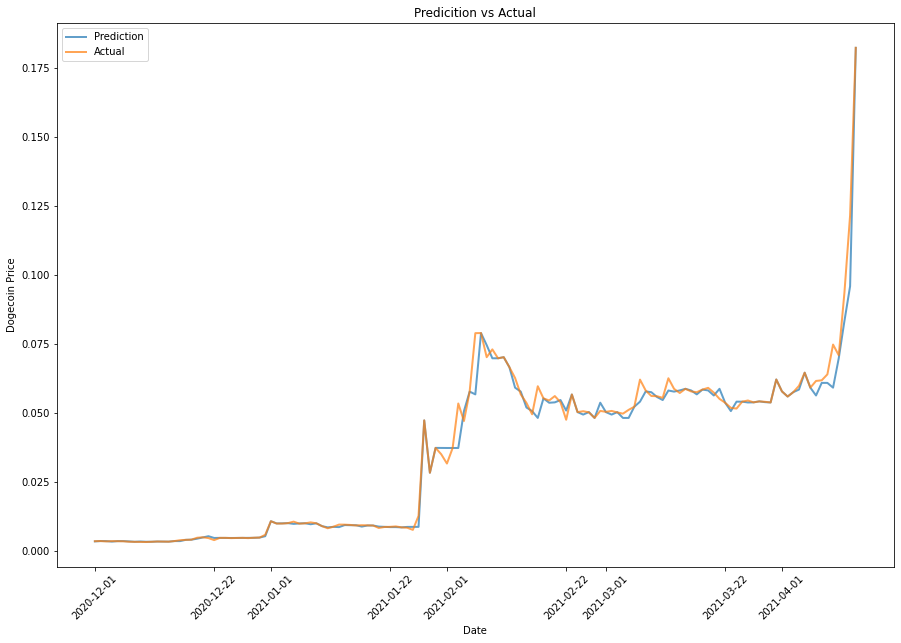

In [34]:
plt.figure(figsize=(15,10))
plt.plot(df.index[:-prediction_days-1], prediction, label='Prediction', lw=2, alpha = 0.7)
plt.plot(df.index[:-prediction_days-1], y, label='Actual', lw=2, alpha=0.7)
plt.title('Predicition vs Actual')
plt.ylabel('Dogecoin Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**THIS IS NOT AN INVESTMENT ADVICE!**